<a href="https://colab.research.google.com/github/sbisen/Social-Capital-ML/blob/master/EmotionalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import gensim.downloader as api
glove_wiki = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [3]:
 def get_w2v_general(text, size, vectors, aggregation='mean'):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in text.split():
        try:
            vec += vectors[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if aggregation == 'mean':
        if count != 0:
            vec /= count
        return vec
    elif aggregation == 'sum':
        return vec

# **Emotional**

# **GloVe**

In [118]:
my_df = pd.read_csv('social_liwc_final.csv')
test_df = pd.read_csv('social_liwc_test.csv')

x_train = my_df['clean_text']
y_train = my_df['emotional']
x_valid = test_df['clean_text']
y_validation = test_df['emotional']

In [27]:
train_vecs_glove_mean_wiki = scale(np.concatenate([get_w2v_general(z, 50, glove_wiki,'mean') for z in x_train.astype(str)]))
validation_vecs_glove_mean_wiki = scale(np.concatenate([get_w2v_general(z, 50, glove_wiki,'mean') for z in x_valid.astype(str)]))

In [ ]:
clf = LogisticRegression()
clf.fit(train_vecs_glove_mean_wiki, y_train)
score=clf.score(validation_vecs_glove_mean_wiki, y_validation)
print('score',score)

clf.score(validation_vecs_glove_mean_wiki, y_validation)
ypredrf = clf.predict(validation_vecs_glove_mean_wiki)
print('classification report')
print(metrics.classification_report(y_validation, ypredrf))

score 0.788235294117647
classification report
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        59
           1       0.61      0.85      0.71        26

    accuracy                           0.79        85
   macro avg       0.76      0.80      0.77        85
weighted avg       0.82      0.79      0.80        85



# **LIWC**

In [28]:
X_train=my_df
X_valid=test_df

enc = StandardScaler()

xtrain_onhot_social = enc.fit_transform(np.array(X_train['social']).reshape(-1,1))
xvalid_onhot_social =enc.transform(np.array(X_valid['social']).reshape(-1,1))

xtrain_onhot_time =enc.fit_transform(np.array(X_train['time']).reshape(-1,1))
xvalid_onhot_time = enc.transform(np.array(X_valid['time']).reshape(-1,1))

xtrain_onhot_we = enc.fit_transform(np.array(X_train['we']).reshape(-1,1))
xvalid_onhot_we = enc.transform(np.array(X_valid['we']).reshape(-1,1))

xtrain_onhot_pos = enc.fit_transform(np.array(X_train['pos']).reshape(-1,1))
xvalid_onhot_pos = enc.transform(np.array(X_valid['pos']).reshape(-1,1))


xtrain_onhot_neg = enc.fit_transform(np.array(X_train['neg']).reshape(-1,1))
xvalid_onhot_neg = enc.transform(np.array(X_valid['neg']).reshape(-1,1))


xtrain_onhot_cer = enc.fit_transform(np.array(X_train['cer']).reshape(-1,1))
xvalid_onhot_cer = enc.transform(np.array(X_valid['cer']).reshape(-1,1))

xtrain_onhot_intero = enc.fit_transform(np.array(X_train['intero']).reshape(-1,1))
xvalid_onhot_intero = enc.transform(np.array(X_valid['intero']).reshape(-1,1))


xtrain_onhot_health = enc.fit_transform(np.array(X_train['health']).reshape(-1,1))
xvalid_onhot_health = enc.transform(np.array(X_valid['health']).reshape(-1,1))

xtrain_onhot_family = enc.fit_transform(np.array(X_train['family']).reshape(-1,1))
xvalid_onhot_family = enc.transform(np.array(X_valid['family']).reshape(-1,1))

xtrain_onhot_achieve = enc.fit_transform(np.array(X_train['achieve']).reshape(-1,1))
xvalid_onhot_achieve = enc.transform(np.array(X_valid['achieve']).reshape(-1,1))

xtrain_onhot_work = enc.fit_transform(np.array(X_train['work']).reshape(-1,1))
xvalid_onhot_work = enc.transform(np.array(X_valid['work']).reshape(-1,1))

xtrain_onhot_leisure = enc.fit_transform(np.array(X_train['leisure']).reshape(-1,1))
xvalid_onhot_leisure = enc.transform(np.array(X_valid['leisure']).reshape(-1,1))

xtrain_onhot_they = enc.fit_transform(np.array(X_train['they']).reshape(-1,1))
xvalid_onhot_they = enc.transform(np.array(X_valid['they']).reshape(-1,1))

xtrain_onhot_relig =enc.fit_transform(np.array(X_train['relig']).reshape(-1,1))
xvalid_onhot_relig = enc.transform(np.array(X_valid['relig']).reshape(-1,1))

xtrain_onhot_assent = enc.fit_transform(np.array(X_train['assent']).reshape(-1,1))
xvalid_onhot_assent = enc.transform(np.array(X_valid['assent']).reshape(-1,1))

xtrain_onhot_money = enc.fit_transform(np.array(X_train['money']).reshape(-1,1))
xvalid_onhot_money = enc.transform(np.array(X_valid['money']).reshape(-1,1))

xtrain_onhot_ppron = enc.fit_transform(np.array(X_train['ppron']).reshape(-1,1))
xvalid_onhot_ppron =enc.transform(np.array(X_valid['ppron']).reshape(-1,1))

xtrain_onhot_affect = enc.fit_transform(np.array(X_train['affect']).reshape(-1,1))
xvalid_onhot_affect = enc.transform(np.array(X_valid['affect']).reshape(-1,1))

**Only LIWC feature**

In [ ]:
xtrain_tfidf = np.hstack([xtrain_onhot_social, xtrain_onhot_time, xtrain_onhot_we, xtrain_onhot_pos, xtrain_onhot_neg,xtrain_onhot_cer, xtrain_onhot_intero, xtrain_onhot_health, xtrain_onhot_family, xtrain_onhot_achieve, xtrain_onhot_work, xtrain_onhot_leisure, xtrain_onhot_they, xtrain_onhot_relig, xtrain_onhot_assent, xtrain_onhot_money, xtrain_onhot_ppron, xtrain_onhot_affect])
xvalid_tfidf = np.hstack([xvalid_onhot_social, xvalid_onhot_time, xvalid_onhot_we, xvalid_onhot_pos, xvalid_onhot_neg,xvalid_onhot_cer, xvalid_onhot_intero, xvalid_onhot_health, xvalid_onhot_family, xvalid_onhot_achieve, xvalid_onhot_work, xvalid_onhot_leisure, xvalid_onhot_they, xvalid_onhot_relig, xvalid_onhot_assent, xvalid_onhot_money, xvalid_onhot_ppron, xvalid_onhot_affect])

y_valid=y_validation
clf = LogisticRegression()
clf.fit(xtrain_tfidf,y_train)
print("Testing accuracy: {}".format(clf.score(xvalid_tfidf, y_valid)))
prediction_all = clf.predict(xvalid_tfidf)
print("Classification report",classification_report(y_valid, prediction_all))

Testing accuracy: 0.6705882352941176
Classification report               precision    recall  f1-score   support

           0       0.73      0.83      0.78        59
           1       0.44      0.31      0.36        26

    accuracy                           0.67        85
   macro avg       0.59      0.57      0.57        85
weighted avg       0.64      0.67      0.65        85



**GloVe + LIWC**

In [ ]:
#with glove and all LIWC feature
xtrain_tfidf = np.hstack([xtrain_onhot_social, xtrain_onhot_time, xtrain_onhot_we, xtrain_onhot_pos, xtrain_onhot_neg,xtrain_onhot_cer, xtrain_onhot_intero, xtrain_onhot_health, xtrain_onhot_family, xtrain_onhot_achieve, xtrain_onhot_work, xtrain_onhot_leisure, xtrain_onhot_they, xtrain_onhot_relig, xtrain_onhot_assent, xtrain_onhot_money, xtrain_onhot_ppron, xtrain_onhot_affect,train_vecs_glove_mean_wiki])
xvalid_tfidf = np.hstack([xvalid_onhot_social, xvalid_onhot_time, xvalid_onhot_we, xvalid_onhot_pos, xvalid_onhot_neg,xvalid_onhot_cer, xvalid_onhot_intero, xvalid_onhot_health, xvalid_onhot_family, xvalid_onhot_achieve, xvalid_onhot_work, xvalid_onhot_leisure, xvalid_onhot_they, xvalid_onhot_relig, xvalid_onhot_assent, xvalid_onhot_money, xvalid_onhot_ppron, xvalid_onhot_affect,validation_vecs_glove_mean_wiki])

y_valid=y_validation
clf = LogisticRegression()
clf.fit(xtrain_tfidf,y_train)
print("Testing accuracy: {}".format(clf.score(xvalid_tfidf, y_valid)))

prediction_all = clf.predict(xvalid_tfidf)
print(classification_report(y_valid, prediction_all))

Testing accuracy: 0.7764705882352941
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        59
           1       0.61      0.77      0.68        26

    accuracy                           0.78        85
   macro avg       0.75      0.77      0.75        85
weighted avg       0.80      0.78      0.78        85



# **Stanford coreNLP**

In [29]:
X_train=my_df
X_valid=test_df
enc = StandardScaler()
xtrain_onhot_senti = enc.fit_transform(np.array(X_train['sentiment']).reshape(-1,1))
xvalid_onhot_senti =enc.transform(np.array(X_valid['sentiment']).reshape(-1,1))

**Only Stanford coreNLP**

In [ ]:
y_valid=y_validation
clf = LogisticRegression()
clf.fit(xtrain_onhot_senti,y_train)
print("Testing accuracy: {}".format(clf.score(xvalid_onhot_senti, y_valid)))
prediction_all = clf.predict(xvalid_onhot_senti)
print("Classification report",classification_report(y_valid, prediction_all))

Testing accuracy: 0.7176470588235294
Classification report               precision    recall  f1-score   support

           0       0.80      0.80      0.80        59
           1       0.54      0.54      0.54        26

    accuracy                           0.72        85
   macro avg       0.67      0.67      0.67        85
weighted avg       0.72      0.72      0.72        85



**GloVe + LIWC + Stanford coreNLP**

In [ ]:
#with glove +LIWC +Stanford coreNLP feature
xtrain_tfidf = np.hstack([xtrain_onhot_social, xtrain_onhot_time, xtrain_onhot_we, xtrain_onhot_pos, xtrain_onhot_neg,xtrain_onhot_cer, xtrain_onhot_intero, xtrain_onhot_health, xtrain_onhot_family, xtrain_onhot_achieve, xtrain_onhot_work, xtrain_onhot_leisure, xtrain_onhot_they, xtrain_onhot_relig, xtrain_onhot_assent, xtrain_onhot_money, xtrain_onhot_ppron, xtrain_onhot_affect,train_vecs_glove_mean_wiki,xtrain_onhot_senti])
xvalid_tfidf = np.hstack([xvalid_onhot_social, xvalid_onhot_time, xvalid_onhot_we, xvalid_onhot_pos, xvalid_onhot_neg,xvalid_onhot_cer, xvalid_onhot_intero, xvalid_onhot_health, xvalid_onhot_family, xvalid_onhot_achieve, xvalid_onhot_work, xvalid_onhot_leisure, xvalid_onhot_they, xvalid_onhot_relig, xvalid_onhot_assent, xvalid_onhot_money, xvalid_onhot_ppron, xvalid_onhot_affect,validation_vecs_glove_mean_wiki,xvalid_onhot_senti])

y_valid=y_validation
clf = LogisticRegression()
clf.fit(xtrain_tfidf,y_train)
print("Testing accuracy: {}".format(clf.score(xvalid_tfidf, y_valid)))

prediction_all = clf.predict(xvalid_tfidf)
print(classification_report(y_valid, prediction_all))

Testing accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        59
           1       0.70      0.73      0.72        26

    accuracy                           0.82        85
   macro avg       0.79      0.80      0.79        85
weighted avg       0.83      0.82      0.82        85



# **TF-IDF N-gram**

In [30]:
tfidf_transformer = TfidfVectorizer(use_idf=True,ngram_range=(1,3)) 
tfidf_train_data = tfidf_transformer.fit_transform(X_train['clean_text'])
tfidf_test_data = tfidf_transformer.transform(X_valid['clean_text'])

In [92]:
my_df['ngram']=np.array(tfidf_train_data)
test_df['ngram']=np.array(tfidf_test_data)

In [106]:
ngram=tfidf_train_data.toarray()
ngram=pd.DataFrame(data=ngram)
ngram.to_csv('ngram.csv')

**Only Ngram**

In [ ]:
y_valid=y_validation
clf = LogisticRegression()
clf.fit(tfidf_train_data.toarray(),y_train)
print("Testing accuracy: {}".format(clf.score(tfidf_test_data.toarray(), y_valid)))
prediction_all = clf.predict(tfidf_test_data.toarray())
print("Classification report",classification_report(y_valid, prediction_all))

Testing accuracy: 0.9058823529411765
Classification report               precision    recall  f1-score   support

           0       0.88      1.00      0.94        59
           1       1.00      0.69      0.82        26

    accuracy                           0.91        85
   macro avg       0.94      0.85      0.88        85
weighted avg       0.92      0.91      0.90        85



# **All Features (gloVe + LIWC + Sentiment + Ngram)**

In [31]:
#with glove and all feature
xtrain_tfidf = np.hstack([xtrain_onhot_social, xtrain_onhot_time, xtrain_onhot_we, xtrain_onhot_pos, xtrain_onhot_neg,xtrain_onhot_cer, xtrain_onhot_intero, xtrain_onhot_health, xtrain_onhot_family, xtrain_onhot_achieve, xtrain_onhot_work, xtrain_onhot_leisure, xtrain_onhot_they, xtrain_onhot_relig, xtrain_onhot_assent, xtrain_onhot_money, xtrain_onhot_ppron, xtrain_onhot_affect,xtrain_onhot_senti,tfidf_train_data.toarray(),train_vecs_glove_mean_wiki])
xvalid_tfidf = np.hstack([xvalid_onhot_social, xvalid_onhot_time, xvalid_onhot_we, xvalid_onhot_pos, xvalid_onhot_neg,xvalid_onhot_cer, xvalid_onhot_intero, xvalid_onhot_health, xvalid_onhot_family, xvalid_onhot_achieve, xvalid_onhot_work, xvalid_onhot_leisure, xvalid_onhot_they, xvalid_onhot_relig, xvalid_onhot_assent, xvalid_onhot_money, xvalid_onhot_ppron, xvalid_onhot_affect,xvalid_onhot_senti,tfidf_test_data.toarray(),validation_vecs_glove_mean_wiki])

In [10]:
y_valid=y_validation
clf = LogisticRegression()
clf.fit(xtrain_tfidf,y_train)
print("Testing accuracy: {}".format(clf.score(xvalid_tfidf, y_valid)))

Testing accuracy: 0.8352941176470589


In [11]:
prediction_all = clf.predict(xvalid_tfidf)
print(classification_report(y_valid, prediction_all))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        59
           1       0.71      0.77      0.74        26

    accuracy                           0.84        85
   macro avg       0.80      0.82      0.81        85
weighted avg       0.84      0.84      0.84        85



In [97]:
my_df.head(2)

,Unnamed: 0,Post id,Post,sentiment,Social capital,emotional,companionship,instrumental,informational,bridging,label,clean_text,tokens,social,time,we,pos,neg,cer,intero,health,family,achieve,work,leisure,they,relig,assent,money,affect,ppron,vector,vector1,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,ngram
0,0,4743.0,CONGRATULATIONS!!! I KNOW THE FEELING OF APPRE...,3,companionship,0,1,0,0,0,2,congratulations i know the feeling of apprecia...,"['congratulations', 'i', 'know', 'the', 'feeli...",3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3.000000e+17,1.000000e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 18207)\t0.1677764832844433\n (0, 28364)..."
1,2,4742.0,hello where di you get the credit help?,2,informational,0,0,0,1,0,4,hello where di you get the credit help,"['hello', 'where', 'di', 'you', 'get', 'the', ...",3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,3.000000e+17,1.000000e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 18207)\t0.1677764832844433\n (0, 28364)..."


# **Feature Select**

In [128]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
target_col = "emotional"
predictor_col = 'social','time','we','pos','neg','cer','intero','health','family','achieve','work','leisure','they','relig','assent','money','ppron','affect','pos senti','neg senti','neu senti'
X = my_df.loc[:, predictor_col]
y = my_df.loc[:, target_col]

In [129]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(chi2, k=20)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(20,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

   Feature_Name      Score
10         work  92.543758
15        money  81.555303
13        relig  64.097609
17       affect  57.554003
3           pos  56.341313
18    pos senti  48.256008
16        ppron  14.709294
20    neu senti  13.284488
5           cer  13.239079
7        health  11.732500
11      leisure  10.043289
19    neg senti   9.445370
0        social   6.897523
2            we   5.437047
4           neg   3.429921
6        intero   1.054322
12         they   0.935208
1          time   0.829757
14       assent   0.681818
9       achieve   0.477841


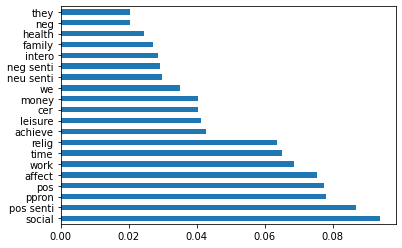

social       0.093832
pos senti    0.086787
ppron        0.078158
pos          0.077443
affect       0.075341
work         0.068597
time         0.065098
relig        0.063568
achieve      0.042767
leisure      0.041290
cer          0.040476
money        0.040355
we           0.035108
neu senti    0.029766
neg senti    0.029093
intero       0.028752
family       0.027019
health       0.024541
neg          0.020509
they         0.020444
dtype: float64


In [130]:
# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X,y)
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)
# print(rf_model.feature_importances_)
# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

In [125]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
target_col = "emotional"
predictor_col = 'social','time','we','pos','neg','cer','intero','health','family','achieve','work','leisure','they','relig','assent','money','ppron','affect','pos senti','neg senti','neu senti','impro','filler','informal','focuspast','focuspr','focusfu','reward','risk','affiliation','home','motion','ingest','bio','feel','see','hear','percep','differ','tentat','discrep','cause','insight','cogproc','friend','quant','compare','adj','number','verb','negate','conj','article','prep','auxv','you','adverb'
X = my_df.loc[:, predictor_col]
y = my_df.loc[:, target_col]

In [126]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(chi2, k=20)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))  # print 20 best features
# export selected features to .csv
df_univ_feat = feature_scores.nlargest(20,'Score')
df_univ_feat.to_csv('feature_selection_UNIVARIATE.csv', index=False)

   Feature_Name      Score
10         work  92.543758
15        money  81.555303
13        relig  64.097609
17       affect  57.554003
3           pos  56.341313
18    pos senti  48.256008
26      focusfu  19.400130
39       tentat  15.035431
16        ppron  14.709294
20    neu senti  13.284488
5           cer  13.239079
7        health  11.732500
11      leisure  10.043289
19    neg senti   9.445370
30         home   9.245283
27       reward   9.107335
33          bio   9.039686
52      article   9.036864
44       friend   8.732468
38       differ   8.488351


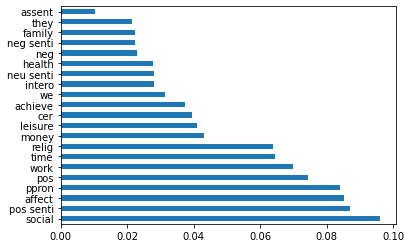

social       0.095879
pos senti    0.086861
affect       0.085102
ppron        0.083926
pos          0.074402
work         0.069771
time         0.064483
relig        0.063753
money        0.043216
leisure      0.040902
cer          0.039425
achieve      0.037433
we           0.031247
intero       0.028133
neu senti    0.028050
health       0.027806
neg          0.023005
neg senti    0.022402
family       0.022351
they         0.021524
assent       0.010330
dtype: float64


In [131]:
# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X,y)
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(46)
# print(rf_model.feature_importances_)
# export selected features to .csv
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv', index=False)
# df_imp_feat.to_csv('feature_selection_IMPORTANCE.csv')
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

# **Relationship of Fearure with Response variable**

In [63]:
from scipy import stats
from scipy.stats.stats import pearsonr
def plot_join_plot(my_df, feature, target):
    j = sns.jointplot(feature, target, data = my_df, kind = 'scatter')
    j.annotate(stats.pearsonr)
    return plt.show()

In [64]:
train_df = pd.concat([X, y], axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


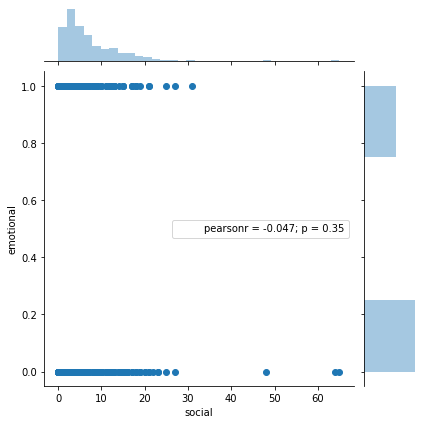

In [65]:
plot_join_plot(train_df, "social", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


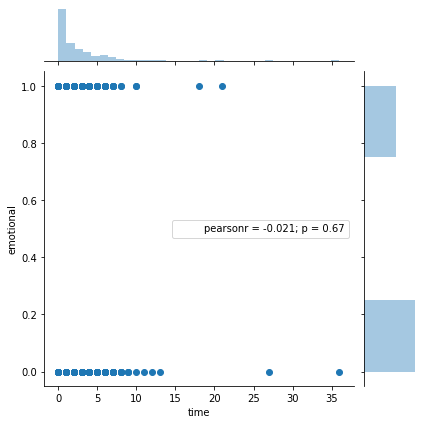

In [66]:
plot_join_plot(train_df, "time", target_col)



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


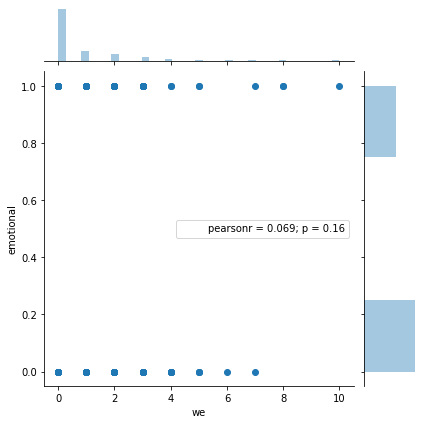

In [67]:
plot_join_plot(train_df, "we", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


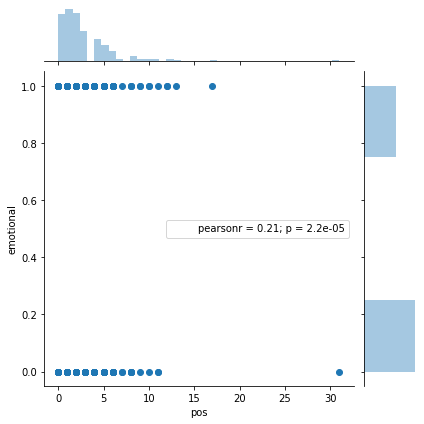

In [68]:
plot_join_plot(train_df, "pos", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


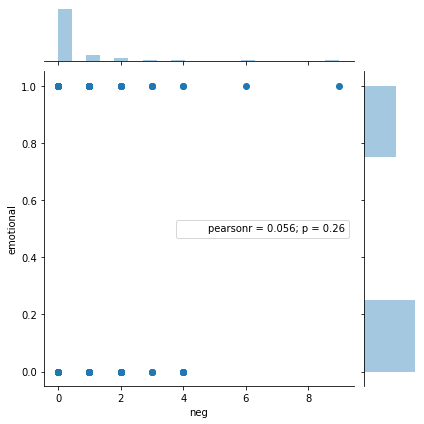

In [69]:
plot_join_plot(train_df, "neg", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


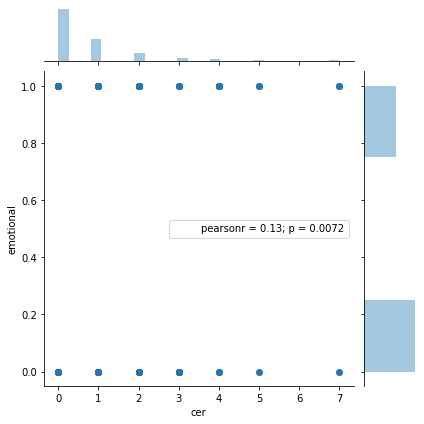

In [70]:
plot_join_plot(train_df, "cer", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


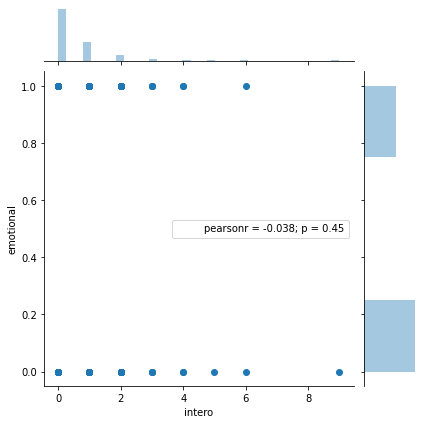

In [71]:
plot_join_plot(train_df, "intero", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


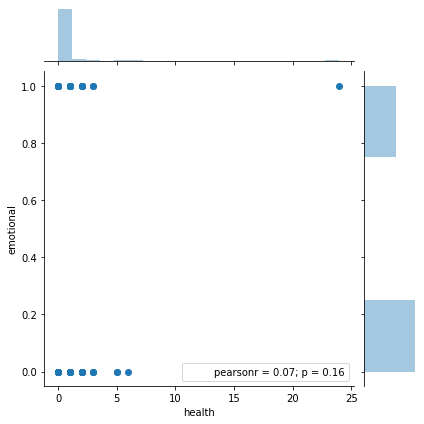

In [72]:
plot_join_plot(train_df, "health", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


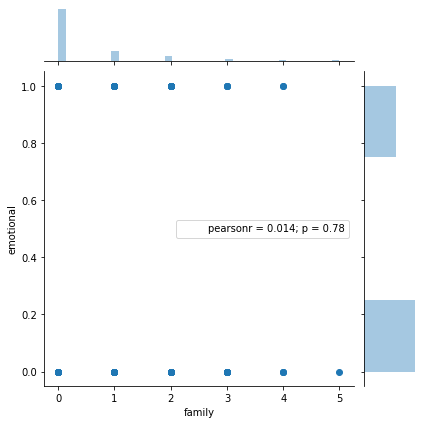

In [73]:
plot_join_plot(train_df, "family", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


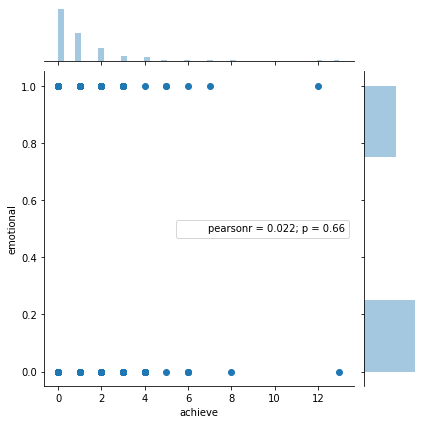

In [74]:
plot_join_plot(train_df, "achieve", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


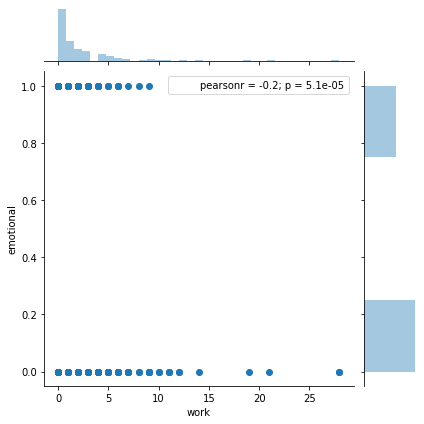

In [75]:
plot_join_plot(train_df, "work", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


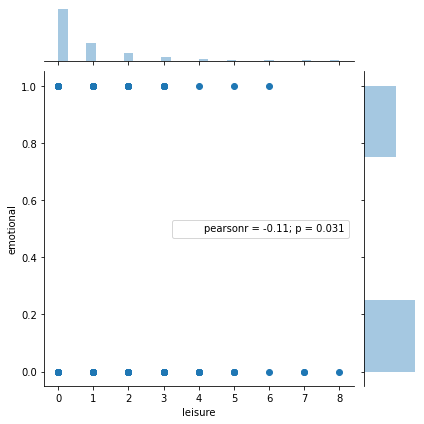

In [76]:
plot_join_plot(train_df, "leisure", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


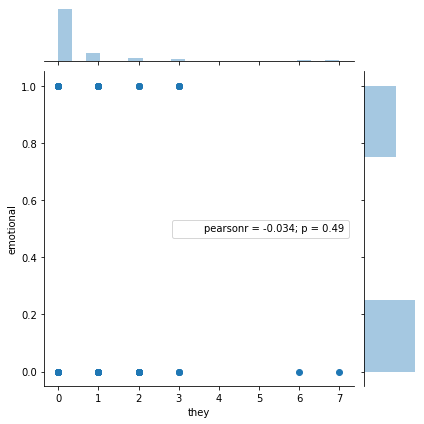

In [77]:
plot_join_plot(train_df, "they", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


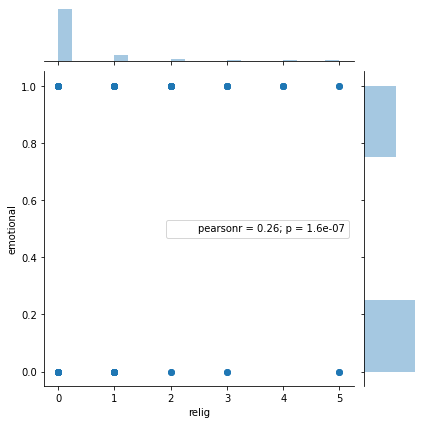

In [78]:
plot_join_plot(train_df, "relig", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


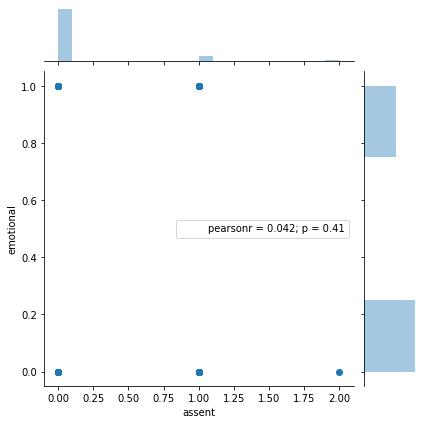

In [79]:
plot_join_plot(train_df, "assent", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


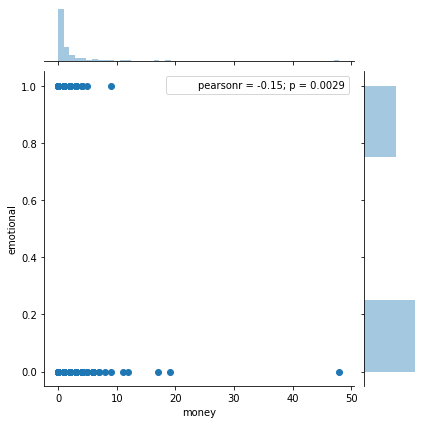

In [80]:
plot_join_plot(train_df, "money", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


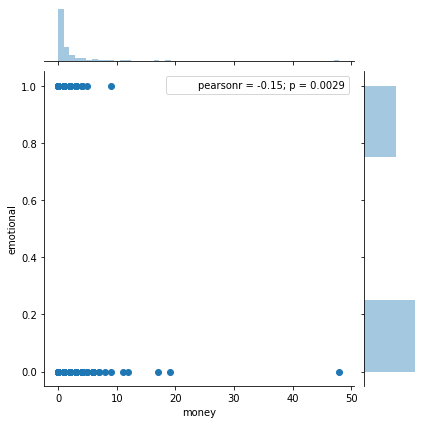

In [81]:
plot_join_plot(train_df, "money", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


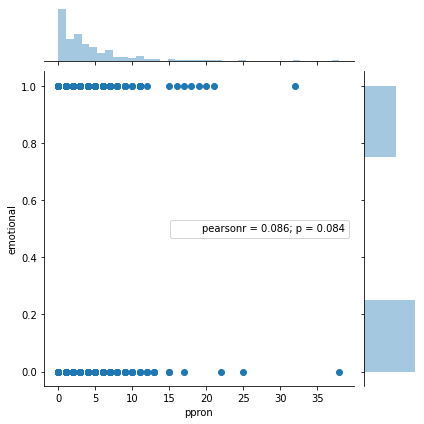

In [82]:
plot_join_plot(train_df, "ppron", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


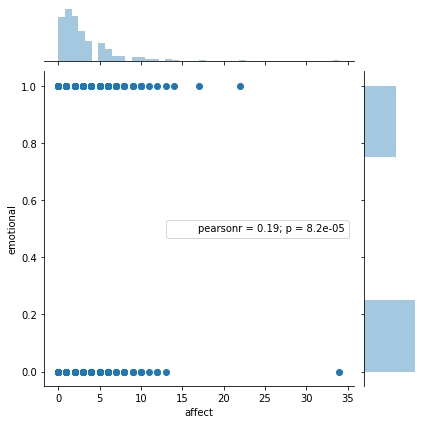

In [83]:
plot_join_plot(train_df, "affect", target_col)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


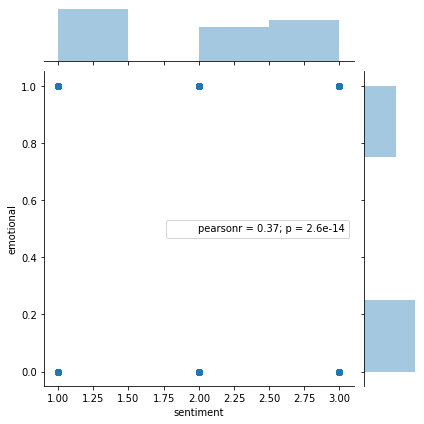

In [84]:
plot_join_plot(train_df, "sentiment", target_col)

# **Correlation Analysis using Pearson analysis**

In [ ]:
'time','we','pos','neg','cer','intero','health','family','achieve','work','leisure','they','relig','assent','money','ppron','affect','sentiment'

In [ ]:
# from sklearn.feature_selection import SelectKBest, chi2

# X_new = SelectKBest(chi2, k=45).fit_transform(xtrain_tfidf, y_train)

In [ ]:
# from sklearn.feature_selection import SelectKBest, chi2

# X= X_train['social'],X_train['time'],X_train['we'],X_train['pos'],X_train['neg'],X_train['cer'], X_train['intero'], X_train['health'], X_train['family'], X_train['achieve'],X_train['work'],X_train['leisure'], X_train['they'],X_train['relig'],X_train['assent'],X_train['money'],X_train['ppron'],X_train['affect'],X_train['sentiment']

# y= y_train



# X_new = SelectKBest(chi2, k=45).fit_transform(X, y_train)